## In this benchmark, we compare throughput (MB/s) while reading a single ROOT file from different (geographical) locations, using different number of local workers.

In [1]:
%env XRD_REQUESTTIMEOUT 300
import os, sys
sys.path.append(os.getcwd()+"/../")
from scenarios.generator_3p2 import generate_configs
from src.benchmark import Benchmark, run_benchmark
import matplotlib.pyplot as plt

env: XRD_REQUESTTIMEOUT=300


### Purdue EOS, FUSE mounted

In [2]:
config_path = "./configs_3.2_EOS_FUSE"
generate_configs(config_path)
report_Purdue_EOS_FUSE = run_benchmark(config_path)

Directory ./configs_3.2_EOS_FUSE created.
Saved 15 config files to ./configs_3.2_EOS_FUSE


  0%|          | 0/15 [00:00<?, ?it/s]2024-04-04 12:02:57,133 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-gu804laa', purging
2024-04-04 12:02:57,133 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:02:57,133 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:02:57,134 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-nh9ougvx', purging
2024-04-04 12:02:57,134 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:02:57,134 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-eamrqu5i', purging
2024-04-04 12:02:57,134 - distributed.diskutils - INFO - Found stale lock file and 

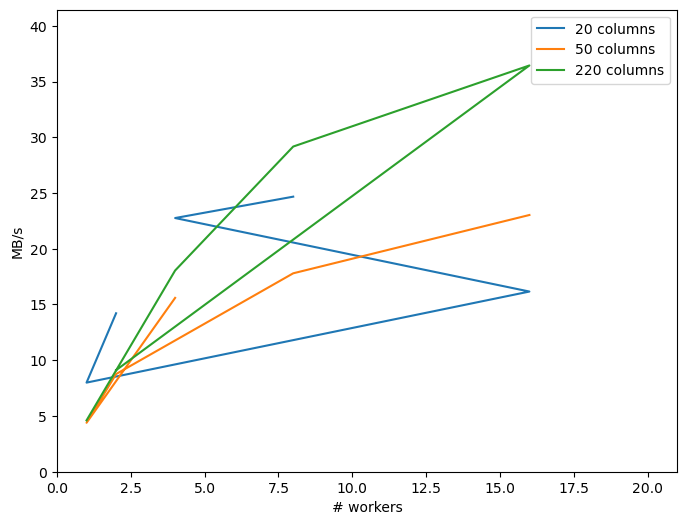

In [3]:
report_Purdue_EOS_FUSE["MB/s (compressed)"] = report_Purdue_EOS_FUSE.compressed_bytes/report_Purdue_EOS_FUSE.run_processor/(1024*1024)

report_by_ncols = report_Purdue_EOS_FUSE.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report_Purdue_EOS_FUSE.n_workers.max()+5)
plt.ylim(0, report_Purdue_EOS_FUSE['MB/s (compressed)'].max() + 5)
plt.show()

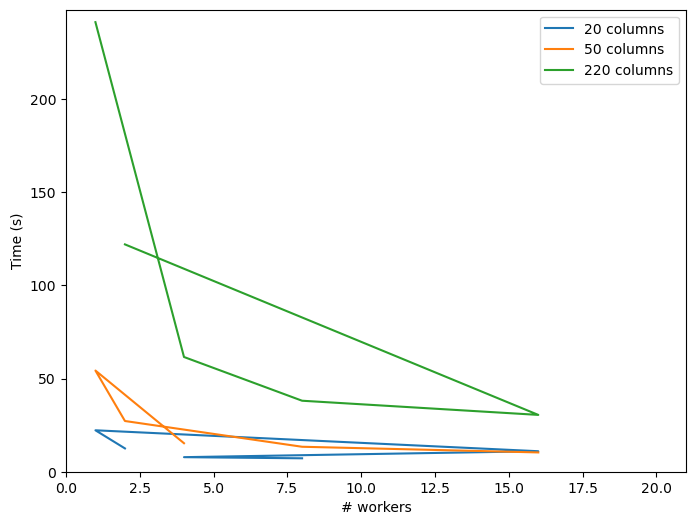

In [4]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.run_processor, label=f"{ncols} columns")
#    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")
    
plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report_Purdue_EOS_FUSE.n_workers.max()+5)
plt.ylim(0, report_Purdue_EOS_FUSE.run.max() + 5)
plt.show()

### Purdue XCache

In [5]:
config_path = "./configs_3.2_XCache"
# generate_configs(config_path)
generate_configs(save_dir=config_path, files=['root://cms-xcache.rcac.purdue.edu:1094//store/data/Run2017C/SingleMuon/NANOAOD/02Apr2020-v1/30000/1458BAF1-0467-344C-99A8-8B216A403FB8.root'])

report = run_benchmark(config_path)

Directory ./configs_3.2_XCache created.
Saved 15 config files to ./configs_3.2_XCache


  0%|          | 0/15 [00:00<?, ?it/s]2024-04-04 12:15:01,776 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:15:01,777 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:15:01,777 - distributed.utils - INFO - Reload module tmp7z2r5z19 from .py file
2024-04-04 12:15:01,777 - distributed.utils - INFO - Reload module tmpdfu1elfk from .py file
2024-04-04 12:15:01,777 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:15:01,778 - distributed.preloading - INFO - Import preload module: /tmp/tmp7z2r5z19.py
2024-04-04 12:15:01,778 - distributed.preloading - INFO - Import preload module: /tmp/tmpdfu1elfk.py
2024-04-04 12:15:01,778 - distributed.utils - INFO - Reload module tmp41k7ee5g from .py file
2024-04-04 12:15:01,778 - distr

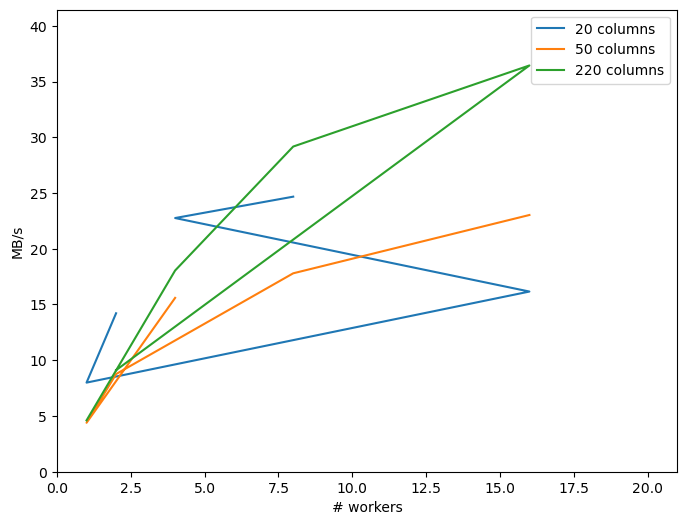

In [6]:
report["MB/s (compressed)"] = report.compressed_bytes/report_Purdue_EOS_FUSE.run_processor/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

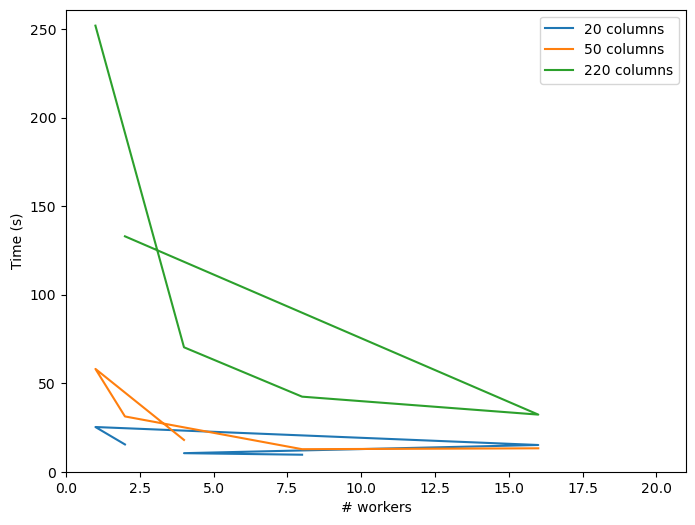

In [7]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.run_processor, label=f"{ncols} columns")
#    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")
    
plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### Purdue EOS, via XRootD

#### (same SE, same file, same but read through XRootD)

In [8]:
# from scenarios.generator_3p2 import generate_configs
config_path = "./configs_3.2_EOS_XRootD"
generate_configs(save_dir=config_path, files=['root://eos.cms.rcac.purdue.edu:1094//store/data/Run2017C/SingleMuon/NANOAOD/02Apr2020-v1/30000/1458BAF1-0467-344C-99A8-8B216A403FB8.root'])

report = run_benchmark(config_path)

Directory ./configs_3.2_EOS_XRootD already exists, will clean all YAML files from it.
Saved 15 config files to ./configs_3.2_EOS_XRootD


  0%|          | 0/15 [00:00<?, ?it/s]2024-04-04 12:28:18,932 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:28:18,932 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:28:18,933 - distributed.utils - INFO - Reload module tmp9yloetge from .py file
2024-04-04 12:28:18,933 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:28:18,933 - distributed.utils - INFO - Reload module tmp1h9w88tt from .py file
2024-04-04 12:28:18,933 - distributed.preloading - INFO - Import preload module: /tmp/tmp9yloetge.py
2024-04-04 12:28:18,933 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 12:28:18,934 - distributed.preloading - INFO - Import preload mo

KilledWorker: Attempted to run task worker_func-8fee468198e475a34267bb7b548fc3c6 on 3 different workers, but all those workers died while running it. The last worker that attempt to run the task was tcp://127.0.0.1:38765. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

2024-04-04 12:43:03,018 - distributed.nanny - WARNING - Worker process still alive after 3.199999389648438 seconds, killing
2024-04-04 12:43:03,019 - distributed.nanny - WARNING - Worker process still alive after 3.199999694824219 seconds, killing
2024-04-04 12:43:03,021 - distributed.nanny - WARNING - Worker process still alive after 3.199999694824219 seconds, killing
2024-04-04 12:43:03,021 - distributed.nanny - WARNING - Worker process still alive after 3.19999984741211 seconds, killing
2024-04-04 12:43:03,023 - distributed.nanny - WARNING - Worker process still alive after 3.199999694824219 seconds, killing
2024-04-04 12:43:03,024 - distributed.nanny - WARNING - Worker process still alive after 3.1999995422363288 seconds, killing
2024-04-04 12:43:03,024 - distributed.nanny - WARNING - Worker process still alive after 3.1999995422363288 seconds, killing
2024-04-04 12:43:03,025 - distributed.nanny - WARNING - Worker process still alive after 3.1999995422363288 seconds, killing
2024-0

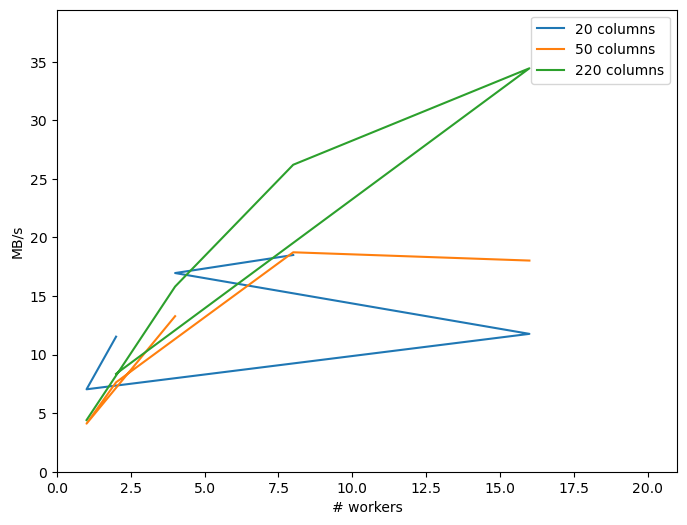

In [9]:
report["MB/s (compressed)"] = report.compressed_bytes/report.run_processor/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

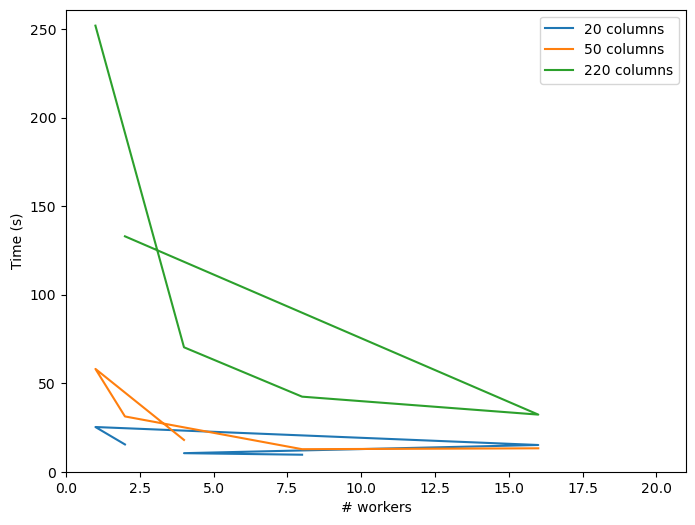

In [10]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.run_processor, label=f"{ncols} columns")
#    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")
    
plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### T2_US_Wisconsin

#### (same file, nearby site, read through XRootD)

In [11]:
# from scenarios.generator_3p2 import generate_configs
config_path = "./configs_3.2_T2_US_Wisconsin"
generate_configs(save_dir=config_path, files=['root://cmsxrootd.hep.wisc.edu:1094//store/data/Run2017C/SingleMuon/NANOAOD/02Apr2020-v1/30000/1458BAF1-0467-344C-99A8-8B216A403FB8.root'])
# generate_configs(save_dir=config_path)

report = run_benchmark(config_path)

Directory ./configs_3.2_T2_US_Wisconsin already exists, will clean all YAML files from it.
Saved 15 config files to ./configs_3.2_T2_US_Wisconsin


  0%|          | 0/15 [00:00<?, ?it/s]2024-04-04 14:50:52,377 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 14:50:52,377 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 14:50:52,377 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 14:50:52,378 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 14:50:52,378 - distributed.utils - INFO - Reload module tmpw9av335e from .py file
2024-04-04 14:50:52,378 - distributed.utils - INFO - Reload module tmpvww2m9kt from .py file
2024-04-04 14:50:52,378 - distributed.utils - INFO - Reload module tmpb_b6bcpr from .py file
2024-04-04 14:50:52,378 - distributed.utils - INFO - Reload module tmp50oecojz from

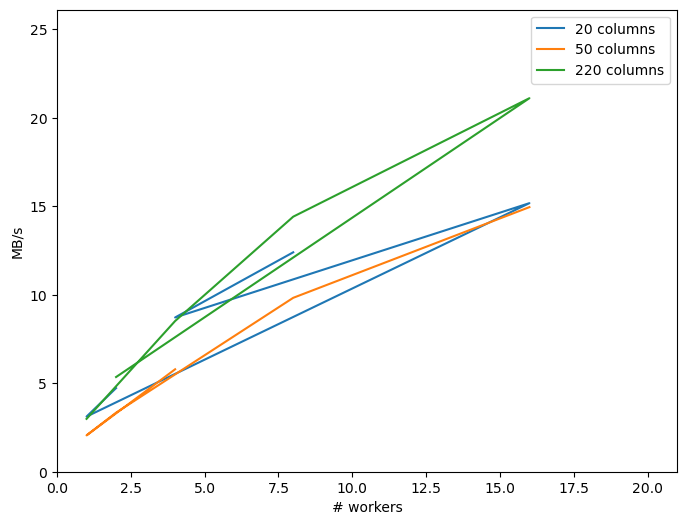

In [12]:
report["MB/s (compressed)"] = report.compressed_bytes/report.run_processor/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

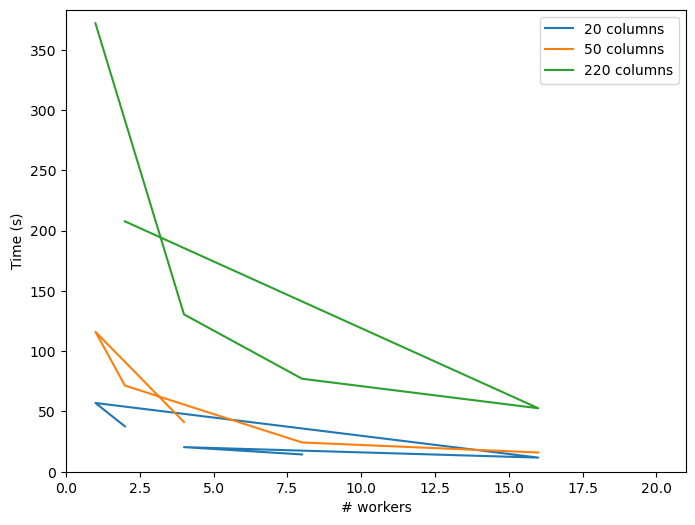

In [13]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.run_processor, label=f"{ncols} columns")
#    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")
    
plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

### T2_DE_DESY

#### (same file, faraway site, read through XRootD)

In [14]:
# from scenarios.generator_3p2 import generate_configs
config_path = "./configs_3.2_T2_DE_DESY"
generate_configs(save_dir=config_path, files=['root://dcache-cms-xrootd.desy.de:1094//store/data/Run2017C/SingleMuon/NANOAOD/02Apr2020-v1/30000/1458BAF1-0467-344C-99A8-8B216A403FB8.root'])
# generate_configs(save_dir=config_path)

report = run_benchmark(config_path)

Directory ./configs_3.2_T2_DE_DESY created.
Saved 15 config files to ./configs_3.2_T2_DE_DESY


  0%|          | 0/15 [00:00<?, ?it/s]2024-04-04 15:13:14,282 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 15:13:14,283 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 15:13:14,283 - distributed.utils - INFO - Reload module tmpsrcwnqjp from .py file
2024-04-04 15:13:14,283 - distributed.utils - INFO - Reload module tmpqv7ulw62 from .py file
2024-04-04 15:13:14,283 - distributed.preloading - INFO - Import preload module: /tmp/tmpsrcwnqjp.py
2024-04-04 15:13:14,284 - distributed.preloading - INFO - Import preload module: /tmp/tmpqv7ulw62.py
2024-04-04 15:13:14,285 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/purdue-af-demo-may2023/');
2024-04-04 15:13:14,285 - distributed.preloading - INFO - Creating preload: import sys; sys.path.insert(0, '/home/spiperov/p

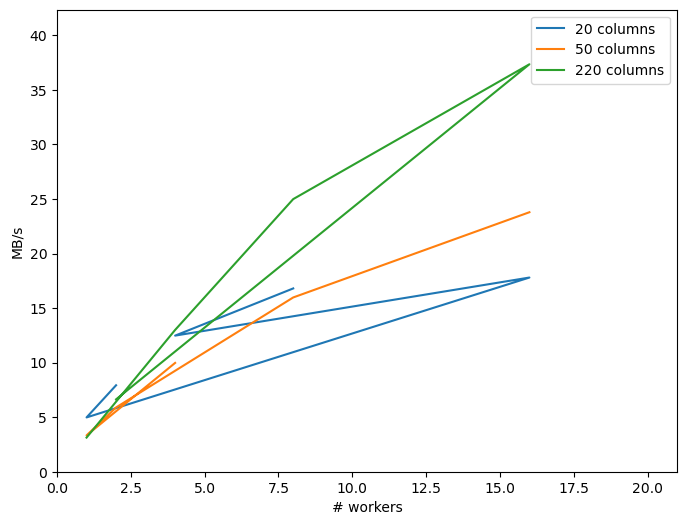

In [15]:
report["MB/s (compressed)"] = report.compressed_bytes/report.run_processor/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

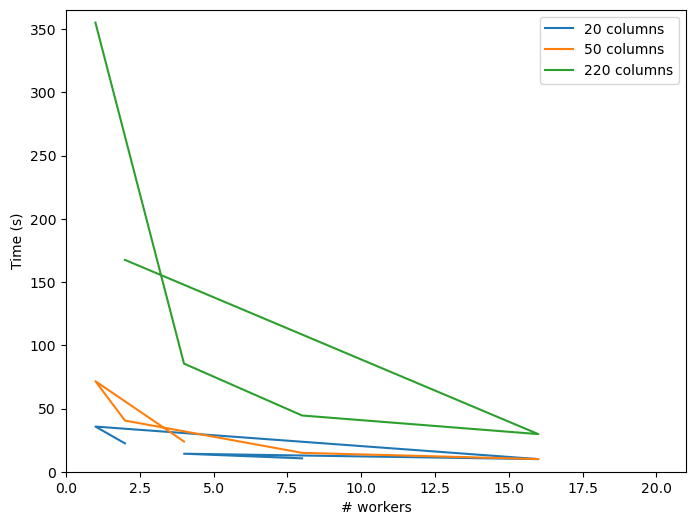

In [16]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.run_processor, label=f"{ncols} columns")
#    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")
    
plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()

(Clearly, our datapoints ordering is off) 